## Devnagari (hindi) character classifier

### Importing necessary libraries

In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

### Reading pixel information from the csv file

In [2]:
dataset = pd.read_csv("data.csv")

In [30]:
# previewing dataset
dataset.head(7)

,pixel_0000,pixel_0001,pixel_0002,pixel_0003,pixel_0004,pixel_0005,pixel_0006,pixel_0007,pixel_0008,pixel_0009,...,pixel_1015,pixel_1016,pixel_1017,pixel_1018,pixel_1019,pixel_1020,pixel_1021,pixel_1022,pixel_1023,character
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,character_01_ka
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,character_01_ka
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,character_01_ka
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,character_01_ka
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,character_01_ka
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,character_01_ka
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,character_01_ka


### Counting frequency of images in subdirectory

In [1]:
import os
list=os.listdir('Images/')
print len(list)
list1=os.listdir('Images/character_01_ka')
print len(list1)
list2=os.listdir('Images/character_02_kha')
print len(list2)
list3=os.listdir('Images/character_03_ga')
print len(list3)
list4=os.listdir('Images/character_04_gha')
print len(list4)
list5=os.listdir('Images/character_05_kna')
print len(list5)



46
2000
2000
2000
2000
2000


### Pixel information and character labels are separated below.

In [ ]:
X = dataset.iloc[:,:-1]
Y_d = dataset.iloc[:,-1]
# labels are removed from pixel values in X and are given to Y_d

In [69]:
num_pixels = X.shape[1]
num_classes = 46
img_width = 32
img_height = 32
img_depth = 1
num_pixels

1024

In [33]:
X_images = X.values.reshape(X.shape[0], img_width, img_height)



## Data exploration

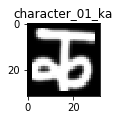

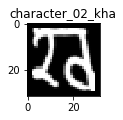

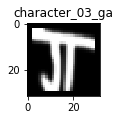

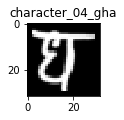

In [35]:
j=2
for i in range(1, 5):    
    plt.subplot(245)
    plt.imshow(X_images[j], cmap=plt.get_cmap('gray'))
    plt.title(Y_d.loc[j])
    j+=2000
    plt.show()
    
   
    


### Character labels are converted into one hot encode format

In [36]:
from sklearn.preprocessing import LabelBinarizer
binencoder = LabelBinarizer()
Y = binencoder.fit_transform(Y_d)


### Imporing keras layers and necessary libraries

In [37]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.callbacks import EarlyStopping
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.utils import np_utils

### training and testing data is split in 80/20 respectively

In [38]:
seed = 146
X_train, X_test, y_train, y_test = train_test_split(X_images, Y, test_size=0.20, random_state=seed)

# data normalization
X_train = X_train/255
X_test = X_test/255

In [39]:
X_train = X_train.reshape(X_train.shape[0], img_width, img_height, img_depth).astype('float32')
X_test = X_test.reshape(X_test.shape[0], img_width, img_height, img_depth).astype('float32')

## Initial model is built

In [66]:
def mod_cnn():
    model = Sequential() # keras sequential model is called
    model.add(Conv2D(32, (4, 4), input_shape=(img_height, img_width, img_depth),activation='relu', name="c_1")) 
    # This layer creates a convolution kernel that is convolved with the layer input with the help 
    #of learnable filters to produce a tensor of outputs
    
    model.add(MaxPooling2D(pool_size=(2, 2), name="p_1")) # downsampling the image representation
    
    model.add(Conv2D(64, (3, 3), activation='relu', name="c_2")) # second conv2d layer
    model.add(MaxPooling2D(pool_size=(2, 2), name="p_2"))
    model.add(Flatten()) # flattens an input of shape (a , b , c )to a simple vector output of shape a*b*c .
    
    model.add(Dense(128, activation='relu', name="d_1")) # nodes of 1 layer are connected to nodes of next layer
    
    model.add(Dense(num_classes, activation='softmax', name="modeloutput")) # softmax activation chosen
    
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy']) # adam optizer is chosen
    return model

In [67]:
model = mod_cnn()

early_stopping_monitor = EarlyStopping(patience=2)

epochs = 10
batch_size = 400
history = model.fit(X_train, y_train, validation_split=0.20, epochs=epochs, batch_size=batch_size, 
                    callbacks=[early_stopping_monitor], verbose=2)

Train on 58880 samples, validate on 14720 samples
Epoch 1/10
 - 46s - loss: 1.6439 - acc: 0.5724 - val_loss: 0.9037 - val_acc: 0.7475
Epoch 2/10
 - 47s - loss: 0.6909 - acc: 0.8066 - val_loss: 0.6043 - val_acc: 0.8239
Epoch 3/10
 - 47s - loss: 0.4912 - acc: 0.8591 - val_loss: 0.5022 - val_acc: 0.8570
Epoch 4/10
 - 47s - loss: 0.3882 - acc: 0.8886 - val_loss: 0.4366 - val_acc: 0.8714
Epoch 5/10
 - 47s - loss: 0.3278 - acc: 0.9045 - val_loss: 0.4031 - val_acc: 0.8840
Epoch 6/10
 - 46s - loss: 0.2782 - acc: 0.9177 - val_loss: 0.3769 - val_acc: 0.8922
Epoch 7/10
 - 46s - loss: 0.2397 - acc: 0.9302 - val_loss: 0.3558 - val_acc: 0.8979
Epoch 8/10
 - 46s - loss: 0.2094 - acc: 0.9384 - val_loss: 0.3564 - val_acc: 0.8976
Epoch 9/10
 - 47s - loss: 0.1806 - acc: 0.9473 - val_loss: 0.3426 - val_acc: 0.9047
Epoch 10/10
 - 46s - loss: 0.1600 - acc: 0.9528 - val_loss: 0.3596 - val_acc: 0.9020


In [68]:
scores = model.evaluate(X_test, y_test, verbose=2)
print("Accuracy: %.2f%%" % (scores[1]*100))

Accuracy: 90.15%


In [80]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
c_1 (Conv2D)                 (None, 29, 29, 32)        544       
_________________________________________________________________
p_1 (MaxPooling2D)           (None, 14, 14, 32)        0         
_________________________________________________________________
c_2 (Conv2D)                 (None, 12, 12, 64)        18496     
_________________________________________________________________
p_2 (MaxPooling2D)           (None, 6, 6, 64)          0         
_________________________________________________________________
flatten_11 (Flatten)         (None, 2304)              0         
_________________________________________________________________
d_1 (Dense)                  (None, 128)               295040    
_________________________________________________________________
modeloutput (Dense)          (None, 46)                5934      
Total para

### Plotting initial model

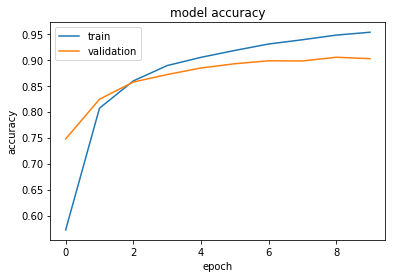

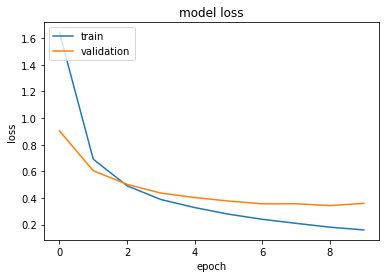

In [69]:
# plotting accuracy v epochs
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

# plotting loss v epochs
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()


## Refined and final model

In [74]:
def mod_cnn2():
    model2 = Sequential()
    model2.add(Conv2D(32, (4, 4), input_shape=(img_height, img_width, img_depth),activation='relu', name="c_1"))
    model2.add(MaxPooling2D(pool_size=(2, 2), name="p_1"))
    model2.add(Conv2D(64, (3, 3), activation='relu', name="c_2"))
    model2.add(MaxPooling2D(pool_size=(2, 2), name="p_2"))
    model2.add(Dropout(0.20)) # first dropout layer
    model2.add(Flatten())
    model2.add(Dense(128, activation='relu', name="d_1"))
    model2.add(Dropout(0.20)) # second dropout layer
    model2.add(Dense(num_classes, activation='softmax', name="modeloutput"))
    model2.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model2

In [75]:
model2 = mod_cnn2()

early_stopping_monitor = EarlyStopping(patience=2)

epochs = 10
batch_size = 400
history = model2.fit(X_train, y_train, validation_split=0.20, epochs=epochs, batch_size=batch_size, 
                    callbacks=[early_stopping_monitor], verbose=2)

Train on 58880 samples, validate on 14720 samples
Epoch 1/10
 - 48s - loss: 1.9739 - acc: 0.4762 - val_loss: 0.9142 - val_acc: 0.7556
Epoch 2/10
 - 47s - loss: 0.8963 - acc: 0.7466 - val_loss: 0.5902 - val_acc: 0.8369
Epoch 3/10
 - 47s - loss: 0.6603 - acc: 0.8078 - val_loss: 0.4660 - val_acc: 0.8715
Epoch 4/10
 - 47s - loss: 0.5436 - acc: 0.8401 - val_loss: 0.4083 - val_acc: 0.8832
Epoch 5/10
 - 47s - loss: 0.4766 - acc: 0.8594 - val_loss: 0.3761 - val_acc: 0.8934
Epoch 6/10
 - 47s - loss: 0.4255 - acc: 0.8733 - val_loss: 0.3486 - val_acc: 0.8995
Epoch 7/10
 - 47s - loss: 0.3841 - acc: 0.8845 - val_loss: 0.3239 - val_acc: 0.9061
Epoch 8/10
 - 47s - loss: 0.3545 - acc: 0.8928 - val_loss: 0.3063 - val_acc: 0.9109
Epoch 9/10
 - 47s - loss: 0.3274 - acc: 0.9000 - val_loss: 0.3031 - val_acc: 0.9114
Epoch 10/10
 - 47s - loss: 0.3080 - acc: 0.9060 - val_loss: 0.2879 - val_acc: 0.9156


In [76]:
scores = model2.evaluate(X_test, y_test, verbose=2)
print("Accuracy: %.2f%%" % (scores[1]*100))

Accuracy: 91.80%


In [79]:
model2.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
c_1 (Conv2D)                 (None, 29, 29, 32)        544       
_________________________________________________________________
p_1 (MaxPooling2D)           (None, 14, 14, 32)        0         
_________________________________________________________________
c_2 (Conv2D)                 (None, 12, 12, 64)        18496     
_________________________________________________________________
p_2 (MaxPooling2D)           (None, 6, 6, 64)          0         
_________________________________________________________________
dropout_11 (Dropout)         (None, 6, 6, 64)          0         
_________________________________________________________________
flatten_13 (Flatten)         (None, 2304)              0         
_________________________________________________________________
d_1 (Dense)                  (None, 128)               295040    
__________

### Plotting final model

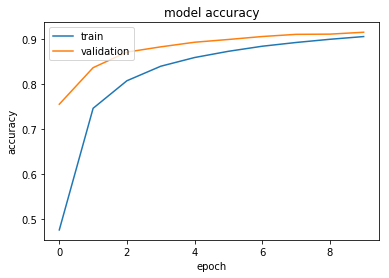

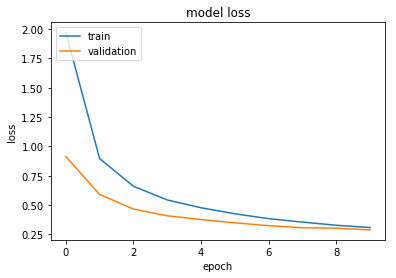

In [77]:
# plotting accuracy v epochs
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

# plotting loss v epochs
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()